In [5]:
import pyprob
from pyprob import ModelRemote
from pyprob.distributions import Normal

import torch
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Run the C++ model in cpproblight:
```
docker run --rm -it --net=host probprog/cpproblight /code/cpproblight/build/cpproblight/test_gum tcp://*:5555
```


In [2]:
gaussian_with_unknown_mean_cpp = ModelRemote('tcp://127.0.0.1:5555')


def correct_posterior(x):
    p = Normal(7.25, math.sqrt(1/1.2))
    return math.exp(p.log_prob(x))

Protocol (Python): zmq.REQ socket connected to server tcp://127.0.0.1:5555
Protocol (Python): this system        : pyprob 0.10.0.dev11
Protocol (Python): connected to system: cpproblight 0.1.0 (HEAD:4b93e48)
Protocol (Python): model name         : Gaussian with unknown mean C++


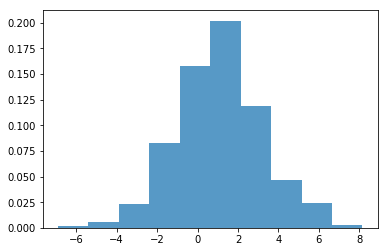

In [3]:
prior_dist = gaussian_with_unknown_mean_cpp.prior_distribution(samples=1000)
n, bins, patches = plt.hist([float(prior_dist.sample()) for i in range(1000)], normed=1, alpha=0.75)

# Importance sampling

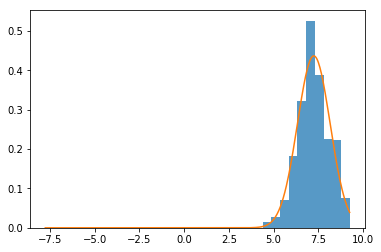

In [6]:
posterior_dist = gaussian_with_unknown_mean_cpp.posterior_distribution(samples=10000, observation=[8,9])
n, bins, patches = plt.hist([float(posterior_dist.sample()) for i in range(1000)], normed=1, alpha=0.75)

x = np.linspace(min(posterior_dist.values_numpy),max(posterior_dist.values_numpy),400)
plt.plot(x, np.vectorize(correct_posterior)(x))

# Inference compilation

In [7]:
gaussian_with_unknown_mean_cpp.learn_inference_network(observation=[0, 0], early_stop_traces=5000)

Creating new inference network...
Polymorphing, new layers for address: [forward(xt::xarray_container<xt::uvector<double, std::allocator<double> >, (xt::layout_type)1, xt::svector<unsigned long, 4ul, std::allocator<unsigned long>, true>, xt::xtensor_expression_tag>)+0x137]_Normal
Train. time | Trace     | Init. loss | Max. loss  | Min. loss  | Curr. loss | T.since min | Traces/sec
0d:00:00:22 | 5,056     | +2.493e+00 | +2.493e+00 | +1.428e+00 | +1.507e+00 | 0d:00:00:08 | 2290d:00:00:00 | 229


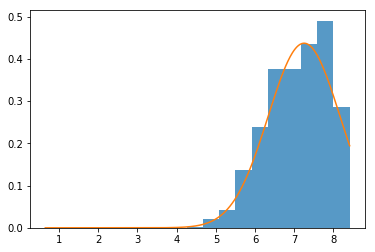

In [8]:
posterior_dist = gaussian_with_unknown_mean_cpp.posterior_distribution(samples=1000, use_inference_network=True, observation=[8,9])
n, bins, patches = plt.hist([float(posterior_dist.sample()) for i in range(1000)], normed=1, alpha=0.75)

x = np.linspace(min(posterior_dist.values_numpy),max(posterior_dist.values_numpy),400)
plt.plot(x, np.vectorize(correct_posterior)(x))